<center>
<h1>Programming Exercise 2:<br>Logistic Regression<br></h1>
<h2>Machine Learning<br></h2>
</center>

# Introduction
In this exercise, you will implement logistic regression and apply it to two
different datasets. Before starting on the programming exercise, we strongly
recommend watching the video lectures and completing the review questions
for the associated topics.

In [1]:
# Import the required libraries.
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import optimize


import mlcourse.submission

submit = mlcourse.submission.create_submission('ex2')

%matplotlib inline

# Logistic Regression

In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.

Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.

Your task is to build a classification model that estimates an applicant's
probability of admission based the scores from those two exams. This outline
and the framework code here will guide you through the exercise.

In [2]:
# Load Data
#  The first two columns contains the exam scores and the third column
#  contains the label.

# read comma separated data
data = pd.read_csv('./data/ex2/ex2data1.csv', header=None)

X = np.array([data[0], data[1]]).T
y = np.array([data[2]]).T

## Visualizing the data

Before starting to implement any learning algorithm, it is always good to
visualize the data if possible. In the first part, the code will load the
data and display it on a 2-dimensional plot by calling the function `plot_data`.

You will now complete the code in `plot_data` so that it displays a figure
like Figure 1, where the axes are the two exam scores, and the positive and
negative examples are shown with different markers.

<center>
    <img src='./figs/ex2_fig1.png'>
    Figure 1:  Scatter plot of training data
</center>

To help you get more familiar with plotting, we have left `plot_data`
empty so you can try to implement it yourself. However, this is an *optional
(ungraded)* exercise. We also provide our implementation below so you can
copy it or refer to it. If you choose to copy our example, make sure you learn
what each of its commands is doing by consulting the documentation.

```python
    # Find Indices of Positive and Negative Examples
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]

    # Plot Examples
    plt.plot(X[pos][:, 0], X[pos][:, 1], 'k+', linewidth=4, markersize=8)
    plt.plot(X[neg][:, 0], X[neg][:, 1], 'yo', markersize=8)
```


In [3]:
def plot_data(X, y):
    """
    plot_data plots the data points X and y into a new figure 

    plots the data points with `+` for the positive examples
    and `o` for the negative examples. X is assumed to be a Mx2 matrix.
    """

    # ====================== YOUR CODE HERE ======================
    # Instructions:
    #     Plot the positive and negative examples on a
    #     2D plot, using the option 'k+' for the positive
    #     examples and 'yo' for the negative examples.


    # Find Indices of Positive and Negative Examples
    pos = np.where(y == 1)[0]
    neg = np.where(y == 0)[0]

    # Plot Examples
    plt.plot(X[pos][:, 0], X[pos][:, 1], 'k+', linewidth=4, markersize=8)
    plt.plot(X[neg][:, 0], X[neg][:, 1], 'yo', markersize=8)

    # =============================================================

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples


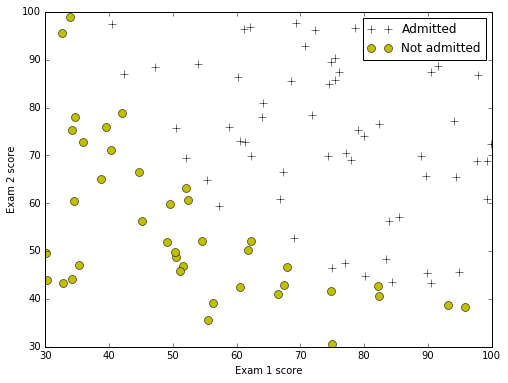

In [4]:
#  We start the exercise by first plotting the data to understand the 
#  the problem we are working with.

print("Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples")

plt.figure(figsize=(8, 6))
plot_data(X, y)

# Put some Labels and the Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend(['Admitted', 'Not admitted'])
# plt.savefig('./figs/ex2_fig1.png')

## Implementation

### Warmup exercise: sigmoid function

Before you start with the actual cost function, recall that the logistic regression
hypothesis is defined as:

$$h_\theta(x) = g(\theta^Tx),$$

where function $g$ is the sigmoid function. The sigmoid function is defined as:

$$g(z) = \dfrac{1}{1 + e^{-z}}.$$

Your first step is to implement this function in `sigmoid` so it can be
called by the rest of your program. When you are finished, try testing a few
values by calling `sigmoid(x)` at an empty cell in the notebook.
For large positive values of $x$, the sigmoid should be close to 1, while for large
negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)`
should give you exactly 0.5. Your code should also work with vectors and
matrices. **For a matrix, your function should perform the sigmoid
function on every element.**

In [5]:
def sigmoid(z):
    """Computes the sigmoid fucntion"""
    
    # You need to return the following values correctly:
    g = np.zeros(np.size(z))
    

    # ====================== YOUR CODE HERE ======================
    # Instructions:
    #     Compute the sigmoid of each value of z (z can be a matrix,
    #     vector or scalar).
    
    g = 1/(1 + np.exp(-1*z))

    # =============================================================
    
    return g

You can submit your solution for grading by calling `submit` with
your login e-mail and submission token. You can obtain a submission
token from the web page for the
assignment.

We assign the login email and submission token to two variables to
redundant typing.

In [6]:
login_email = 'example@example.com'
submission_token = 'SUBMISSIONTOKEN'

In [7]:
#You should now submit your solutions.
submit(login_email, submission_token)

'example@example.com successfully submitted ex2'

### Cost function and gradient

Now you will implement the cost function and gradient for logistic regression.
Complete the code in `cost_function` to return the cost and gradient.

Recall that the cost function in logistic regression is

$$J(\theta) = \dfrac{1}{m} \sum_{i = 1}^{m} \left[-y^{(i)}\log{(h_\theta(x^{(i)}))} -(1-y^{(i)})\log{(1- h_\theta(x^{(i)}))} \right],$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{\text{th}}$ element
(for $j = 0, 1, \ldots , n$) is defined as follows:

$$\dfrac{\partial J(\theta)}{\partial \theta_j} = \dfrac{1}{m} \sum_{i = 1}^{m} (h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

Note that while this gradient looks identical to the linear regression gradient,
the formula is actually different because linear and logistic regression
have different definitions of $h_\theta(x)$.

Once you are done, the notebook will call your `cost_function` using the initial
parameters of $\theta$. You should see that the cost is about 0.693.



In [8]:
def cost_function(theta, X, y):
    """Compute cost and gradient for logistic regression
    
    Computes the cost of using theta as the parameter for 
    logistic regression and the gradient of the cost w.r.t.
    the parameters.
    """
    
    # Initialize some useful values
    
    # number of training examples
    m = len(y)

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    # Instructions:
    #     Compute the cost of a particular choice of theta.
    #     You should set J to the cost.
    #     Compute the partial derivatives and set grad to the partial
    #     derivatives of the cost w.r.t. each parameter in theta
    #
    # Note:
    #     grad should have the same dimensions as theta
    #
    j0 = y.T.dot(np.log(sigmoid(X.dot(theta))))
    j1 = (1 - y).T.dot(np.log(1 - sigmoid(X.dot(theta))))
    J = (j0 + j1)*(-1)*(1.0/m)
    grad = (1.0/m)*(X.T.dot(sigmoid(X.dot(theta)) - y))


    # =============================================================
    
    return J, grad

In [9]:
#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to x and X_test
k = np.ones((m, n+1))
k[:, 1:] = X
X = k

# Initialize fitting parameters
initial_theta = np.zeros((n + 1, 1))

# Compute and display initial cost and gradient
cost, grad = cost_function(initial_theta, X, y)

print('Cost at initial theta (zeros): {}\n'.format(cost))
print('Gradient at initial theta (zeros):')
print('{}'.format(grad))

Cost at initial theta (zeros): [[ 0.69314718]]

Gradient at initial theta (zeros):
[[ -0.1       ]
 [-12.00921659]
 [-11.26284221]]


In [10]:
# You should now submit your solutions
submit(login_email, submission_token)

'example@example.com successfully submitted ex2'

### Learning parameters using `fmin`

In the previous assignment, you found the optimal parameters of a linear regression
model by implementing gradent descent. You wrote a cost function
and calculated its gradient, then took a gradient descent step accordingly.
This time, instead of taking gradient descent steps, you will use a `scipy`
built-in function called `fmin`.

Scipy's `optimize.fmin` is an optimization solver that finds the minimum
of an unconstrained [1] function. For logistic regression, you want to
optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `fmin` to find the best parameters $\theta$
for the logistic regression cost function, given a fixed dataset (of X and y
values). You will pass to `fmin` the following inputs:

* The initial values of the parameters we are trying to optimize.
* A function that, when given the training set and a particular $\theta$, computes
    the logistic regression cost with respect to $\theta$ for the dataset
    $(X, y)$
    
In the next cell, we have written code to call `fmin` with the correct arguments.

```python
    # Set options for fmin
    options = {'full_output': True, 'maxiter': 400}
    
    # Run fminunc to obtain the optimal theta
    # This function will return theta and the cost
    # (we ignore the other values returned by the function)
    theta, cost, _, _, _ = optimize.fmin(lambda t: cost_function(t, X, y)[0], initial_theta, **options)
```

In this code snippet, we first defined the options to be used with `fmin`.
We set the `maxiter` option to 400, so that `fmin` will run for at most 400 steps before
it terminates.

To specify the actual function we are minimizing, we use the "short-hand"
lambda notation for specifying functions with the
```python
    lambda t: cost_function(t, X, y)[0]
```
This creates a function, with argument t, which calls your `cost_function`. This
allows us to wrap the `cost_function` for use with `fmin`.

If you have completed the `cost_function` correctly, `fmin` will converge
on the right optimization parameters and return the final values of the cost
and $\theta$. Notice that by using `fmin`, you did not have to write any loops
yourself, or set a learning rate like you did for gradient descent. This is all
done by `fmin`: you only needed to provide a function calculating the cost
and the gradient.

Once `fmin` completes, we will call your `cost_function` function
using the optimal parameters of `theta`. You should see that the cost is about
0.203.

> [**1**]
> Constraints in optimization often refer to constraints on the parameters, for example,
> constraints that bound the possible values $\theta$ can take (e.g., $\theta \leq 1$). Logistic regression
> does not have such constraints since $\theta$ is allowed to take any real value.

In [11]:
# Set options for fmin
options = {'full_output': True, 'maxiter': 400}

# Run fminunc to obtain the optimal theta
# This function will return theta and the cost
# (we ignore the other values returned by the function)
theta, cost, _, _, _ = optimize.fmin(lambda t: cost_function(t, X, y)[0], initial_theta, **options)

# Print theta to screen
print('\n')
print('Cost at theta found by fmin: {}'.format(cost))
print('theta: {}'.format(theta))

Optimization terminated successfully.
         Current function value: 0.203498
         Iterations: 157
         Function evaluations: 287


Cost at theta found by fmin: 0.20349770159
theta: [-25.16130062   0.20623142   0.20147143]


This final $\theta$ value will then be used to plot the decision boundary on the
training data, resulting in a figure similar to Figure 2. We also encourage
you to look at the code in `plot_decision_boundary` to see how to plot such
a boundary using the $\theta$ values.

<center>
    <img src='./figs/ex2_fig2.png'>
    Figure 2:  Training data with decision boundary
</center>

In [12]:
def map_feature(X1, X2):
    """
    Feature mappring function to polynomial features
    
    Maps the two input features to quadratic features used in the
    regularization exercise.
    
    Returns a new feature array with more features comprising of
    X1, X2, X1**2, X2**2, X1*X2, X1*(X2**2), etc...
    
    Inputs X1 and X2 must be the same size.
    """
    
    degree = 6
    out = np.ones(np.size(X1[:, 0]))
    for i in range(degree):
        for j in range(i):
            out[:, -1] = (X1**(i-j))*(X2**j)
    return out

def plot_decision_boundary(theta, X, y):
    """
    Plots the data points X and y into a new figure with
    the decision boundary defined with theta.
    
    Plots the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a 
    either
        1. Mx3 matrix, where the first column is all-ones
        column for the intercept.
        2. MxN, N>3 matrix, where the first column is
        all-ones.
    """
    
    # Plot data
    plot_data(X[:, 1:3], y)
    
    if X.shape[1] <= 3:
        # only need two points to define a line, so choose two endpoints
        plot_x = np.array([min(X[:, 1])-2, max(X[:, 1])+2])
        
        # calculate the decision boundary line
        plot_y = (-1.0/theta[2])*(theta[1]*plot_x + theta[0])
        
        # plot and adjust axes for better viewing
        plt.plot(plot_x, plot_y)
        
        # exercise specific legend
        plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
        plt.axis([30, 100, 30, 100])
    
    else:
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)
        
        z = np.zeros((len(u), len(v)))
        
        for i, ui in enumerate(u):
            for j, vi in enumerate(v):
                z[i, j] = map_feature(ui, vi)*theta
                
        z = z.T
        
        # plot z = 0
        plt.contour(u, v, z, [0, 0], linewidth=2)

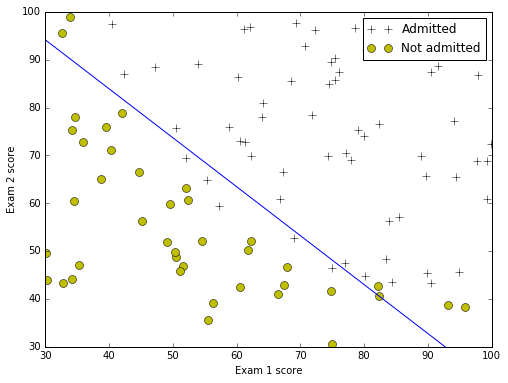

In [13]:
# Plot Boundary
plt.figure(figsize=(8, 6))
plot_decision_boundary(theta, X, y)

# Put some labels 
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Specified in plot order
plt.legend(['Admitted', 'Not admitted'])
# plt.savefig('./figs/ex2_fig2.png')

### Evaluating logistic regression

After learning the parameters, you can use the model to predict whether a
particular student will be admitted. For a student with an Exam 1 score
of 45 and an Exam 2 score of 85, you should expect to see an admission
probability of 0.776.

Another way to evaluate the quality of the parameters we have found
is to see how well the learned model predicts on our training set. In this
part, your task is to complete the code in `predict`. The predict function
will produce "1" or "0" predictions given a dataset and a learned parameter
vector $\theta$.

After you have completed the code in `predict`, the notebook will
proceed to report the training accuracy of your classifier by computing the
percentage of examples it got correct.

In [14]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using the learned logistic
    regression parametres theta.
    
    Computes the predictions for X using a threshold at 0.5 (i.e.,
    if sigmoid(theta.T.dot(x)) >= 0.5, predict 1)
    """
    
    # number of training examples
    m = X.shape[0]
    
    # you need to return the following values correctly
    p = np.zeros((m, 1))

    # ====================== YOUR CODE HERE ======================
    # Instructions:
    #     Complete the following code to make predictions using
    #     your learned logistic regression parameters. 
    #     You should set p to a vector of 0's and 1's

    p = np.round(sigmoid(X.dot(theta)))

    # ============================================================
    
    return p.reshape(m, 1)

In [15]:
#  After learning the parameters, you'll like to use it to predict the outcomes
#  on unseen data. In this part, you will use the logistic regression model
#  to predict the probability that a student with score 45 on exam 1 and 
#  score 85 on exam 2 will be admitted.
#
#  Furthermore, you will compute the training and test set accuracies of 
#  our model.


#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print('For a student with score 45 and 85, we predict an admission probability of {}'.format(prob))


# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {}'.format(np.mean(np.double(p == y)*100)))

For a student with score 45 and 85, we predict an admission probability of 0.776291590411
Train Accuracy: 89.0


In [16]:
# You should now submit your solutions
submit(login_email, submission_token)

'example@example.com successfully submitted ex2'